# Erdős collaboration graph

## Michaletzky Tamás

<img style="float: right;" src="Erdos graph full plot.png">

# Erdős collaboration graph

 - Named after Hungarian mathematician Erdős Pál
 - Contains authors that has at least one common publication with Erdős (Erdős number = 1)
 - Erdős had written actually more than 1400 articles, contributed with more than 500 authors
 
 <img src="cgraph.jpg" alt="drawing" width="900"/>

# Import and create graph

In [14]:
import networkx as nx

import numpy as np
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter

import pprint 
pp = pprint.PrettyPrinter(indent=4, sort_dicts=False)

#for read and write
import re
import itertools
import json

#data analyse
import random
import statistics

#topological analysis
from networkx.algorithms import approximation
import collections
import numpy as np
import matplotlib.colors as mcolors

#for finding matches
from difflib import get_close_matches

In [2]:
with open('erdosgraph.json', 'r') as f:
    erdos = json.load(f)

names = erdos['names']
nodes = dict([x for x in enumerate(names)])

edges = {}
for id_, n_ in zip(erdos['ids'], erdos['neighbors']):
    edges[nodes[id_-1]] = [nodes[el-1] for el in n_]

G = nx.from_dict_of_lists(edges)

# Topological analysis of graph

In [31]:
def connected_components_dict(G):
    ccG = []
    counter = 0
    for g in nx.connected_components(G):
        counter += 1
        ccG.append(len(g))
    return(counter, Counter(ccG))

In [34]:
print("Number of Erdős graph nodes:", G.order())
print("Number of edges:", G.size())
print("Number of connected components: ", connected_components_dict(G))
print("Average degree:", G.size()/G.order())
print("Maximal degrees:", sorted(dict(G.degree()).items(), key=lambda item: item[1], reverse=True)[:6])
#print("ECG's largest clique: ", nx.algorithms.approximation.clique.max_clique(G))
print("ECG's largest clique: 'Rodl, Vojtech', 'Szemeredi, Endre', 'Spencer, Joel H', 'Alon, Noga M', 'Ajtai, Miklos', 'Babai, Laszlo'")

Number of Erdős graph nodes: 511
Number of edges: 1604
Number of connected components:  (42, Counter({1: 37, 2: 4, 466: 1}))
Average degree: 3.1389432485322897
Maximal degrees: [('Alon, Noga M', 51), ('Graham, Ronald Lewis', 44), ('Harary, Frank', 44), ('Rodl, Vojtech', 42), ('Tuza, Zsolt', 39), ('Bollobas, Bela', 37)]
ECG's largest clique: 'Rodl, Vojtech', 'Szemeredi, Endre', 'Spencer, Joel H', 'Alon, Noga M', 'Ajtai, Miklos', 'Babai, Laszlo'


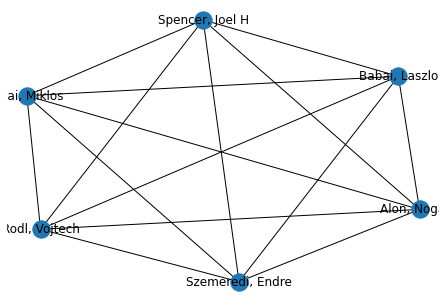

In [10]:
G_clique = ['Rodl, Vojtech', 'Szemeredi, Endre', 'Spencer, Joel H', 'Alon, Noga M', 'Ajtai, Miklos', 'Babai, Laszlo']
nx.draw(Gm.subgraph(G_clique), with_labels = True)

In [37]:
MainComponent = list(nx.connected_components(G))[0]
Gm = nx.subgraph(G,MainComponent)

In [38]:
def degree_plot(G, xscale, yscale):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    pk=[]
    for x in cnt:
        pk.append(x/G.order())

    plt.plot(np.array(deg), np.array(pk),'.', color='red')
    plt.title("Degree Distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.yscale(yscale)
    plt.xscale(xscale)
    plt.show()

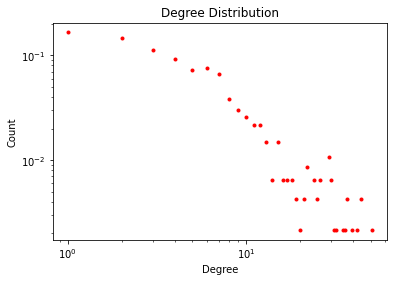

In [39]:
degree_plot(Gm, "log", "log")

In [40]:
def full_plot(G, title):
    pos = nx.spring_layout(G)
    fig, ax = plt.subplots(figsize=[15,10])
    plt.axis('off')
    plt.title(title)

    degrees = G.degree()
    nodes = G.nodes()
    n_color = np.asarray([degrees[n] for n in nodes])
    sc=nx.draw_networkx_nodes(G, pos, nodelist=nodes, ax=ax, node_size=n_color, node_color=n_color, cmap='viridis')
    nx.draw_networkx_edges(G, pos, alpha=0.2)

    sc.set_norm(mcolors.LogNorm())
    fig.colorbar(sc)
    #plt.savefig('Erdos graph full plot.png')

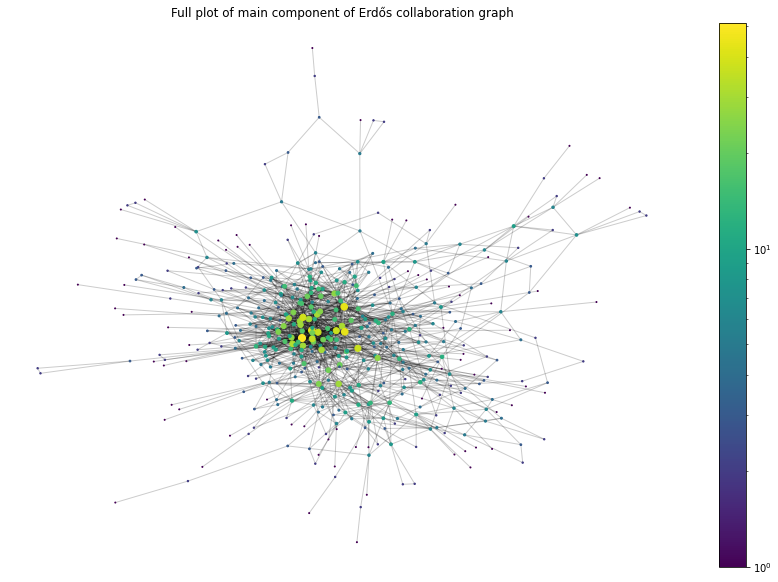

In [46]:
title = "Full plot of main component of Erdős collaboration graph"
full_plot(Gm, title)

## PageRank

In [47]:
print("Maximal degrees:", sorted(dict(G.degree()).items(), key=lambda item: item[1], reverse=True)[:6])

Maximal degrees: [('Alon, Noga M', 51), ('Graham, Ronald Lewis', 44), ('Harary, Frank', 44), ('Rodl, Vojtech', 42), ('Tuza, Zsolt', 39), ('Bollobas, Bela', 37)]


In [13]:
pagerank = nx.pagerank(G)

sorted_pagerank = {key: value for key, value in sorted(pagerank.items(), key=lambda item: item[1], reverse=True)}

pp.pprint(sorted_pagerank)

{   'Harary, Frank': 0.011004854162400709,
    'Alon, Noga M': 0.010889720842041855,
    'Graham, Ronald Lewis': 0.00976741549286609,
    'Sos, Vera Turan': 0.009298119591442475,
    'Rodl, Vojtech': 0.008897497436304283,
    'Pomerance, Carl Bernard': 0.008871848510092139,
    'Tuza, Zsolt': 0.00865023528170984,
    'Bollobas, Bela': 0.008501531478786729,
    'Spencer, Joel H': 0.007813861054044495,
    'Furedi, Zoltan': 0.007772037659630317,
    'Hajnal, Andras': 0.007724924589860209,
    'Pach, Janos': 0.00764687278043238,
    'Straus, Ernst Gabor': 0.007346051311257919,
    'Chung, Fan Rong King Graham': 0.006930571004377538,
    'Kleitman, Daniel J': 0.006790959497526791,
    'Sarkozy, Andras': 0.006715223139381747,
    'Lovasz, Laszlo': 0.006595144684432688,
    'Nesetril, Jaroslav': 0.006453029888475893,
    'Faudree, Ralph Jasper, Jr': 0.006263649953602368,
    'Szemeredi, Endre': 0.006210867412132446,
    'Gyarfas, Andras': 0.00610587376254296,
    'Babai, Laszlo': 0.005737878

In [51]:
def plot_3_graph(authors):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,8))
    ax = axes.flatten()

    for i,author in enumerate(authors):
        neighbors = set(author).union(set([n for n in G[author]]))
        H = G.subgraph(neighbors)
        nx.draw(H, with_labels =True, pos = nx.kamada_kawai_layout(H), ax=ax[i])
        ax[i].set_title('Size of neighbors of %s is %i'%(author,len(H.nodes)))
        ax[i].set_axis_off()

    plt.show()

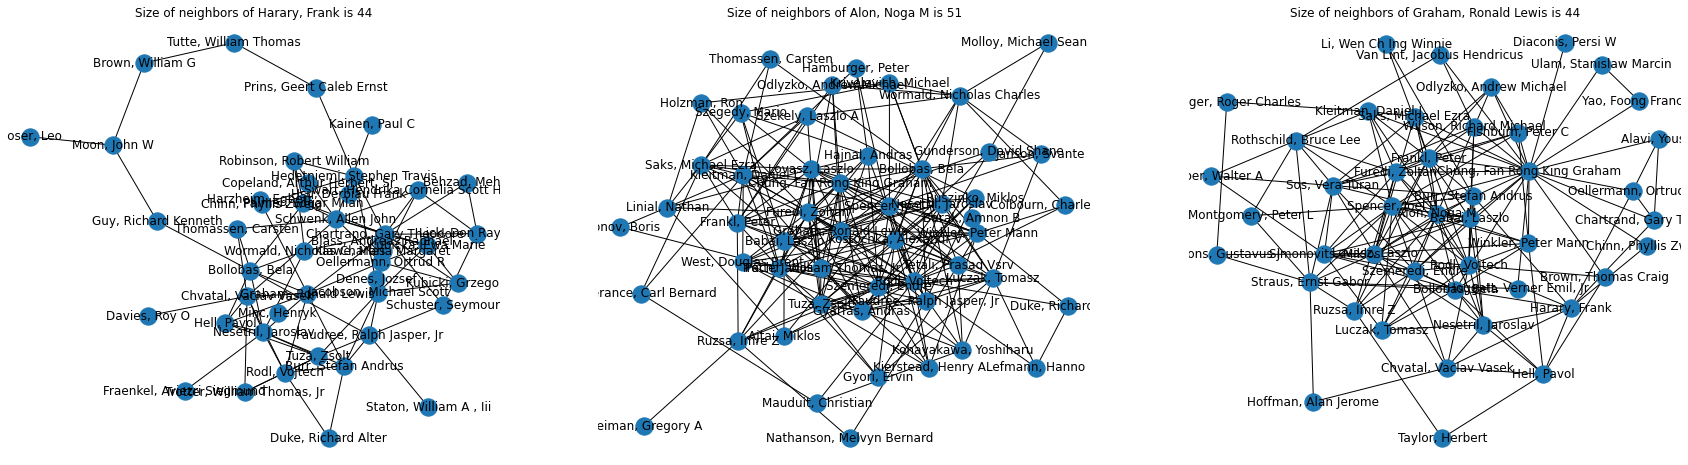

In [52]:
# Plot Top3 PageRank neighbor graph 
nodes = ['Harary, Frank', 'Alon, Noga M', 'Graham, Ronald Lewis']

plot_3_graph(nodes)

# SimRank

In [15]:
C = nx.k_core(G, k=10)
simrank = nx.simrank_similarity(C)

In [16]:
layout = nx.spring_layout(C)

In [17]:
name = 'Alon, Noga M'
if name in G.nodes():
    pp.pprint({key: value for key, value in sorted(simrank[name].items(), key=lambda item: item[1], reverse=True)})
else:
    print('Did you mean: %s?'%get_close_matches(name, G.nodes()))

{   'Alon, Noga M': 1,
    'Chung, Fan Rong King Graham': 0.2852934352946267,
    'Trotter, William Thomas, Jr': 0.2845484231397398,
    'Simonovits, Miklos': 0.2825179460197713,
    'Tuza, Zsolt': 0.2822111115245824,
    'Kostochka, Alexandr V': 0.28175467053524933,
    'Luczak, Tomasz': 0.2814539229045891,
    'Pach, Janos': 0.28139499574351,
    'Szemeredi, Endre': 0.2807386344720546,
    'Spencer, Joel H': 0.2805786960286664,
    'Furedi, Zoltan': 0.280368054222577,
    'Burr, Stefan Andrus': 0.2803574177732299,
    'Rodl, Vojtech': 0.2798084794247177,
    'Gyarfas, Andras': 0.2790906591223694,
    'Nesetril, Jaroslav': 0.27895957763275664,
    'Bollobas, Bela': 0.27895483381272923,
    'Graham, Ronald Lewis': 0.27833674044538054,
    'Babai, Laszlo': 0.2780267294105138,
    'Frankl, Peter': 0.2770512704408788,
    'Lovasz, Laszlo': 0.27703340264735404,
    'Sos, Vera Turan': 0.27686863848432536,
    'Schelp, Richard H': 0.27671199645218925,
    'Faudree, Ralph Jasper, Jr': 0.27406

In [59]:
print(set(G['Alon, Noga M']).intersection(set(G['Harary, Frank'])))

{'Bollobas, Bela', 'Wormald, Nicholas Charles', 'Rodl, Vojtech', 'Duke, Richard Alter', 'Tuza, Zsolt', 'Faudree, Ralph Jasper, Jr', 'Graham, Ronald Lewis', 'Thomassen, Carsten', 'Nesetril, Jaroslav', 'Trotter, William Thomas, Jr'}


In [60]:
def common_neighbors_plot_2_graphs(G, author):
    neighbors = set(author).union(set([n for n in G[author]]))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8))
    ax = axes.flatten()

    for i,coauthor in enumerate(nodes):
        common_neighbors = set(coauthor).union(set([n for n in G[coauthor]])).intersection(neighbors)
        H = G.subgraph(common_neighbors)
        nx.draw(H, with_labels =True, pos = nx.kamada_kawai_layout(H), ax=ax[i])
        ax[i].set_title('Common neighbors of %s and %s'%(author, coauthor))
        ax[i].set_axis_off()

    plt.show()

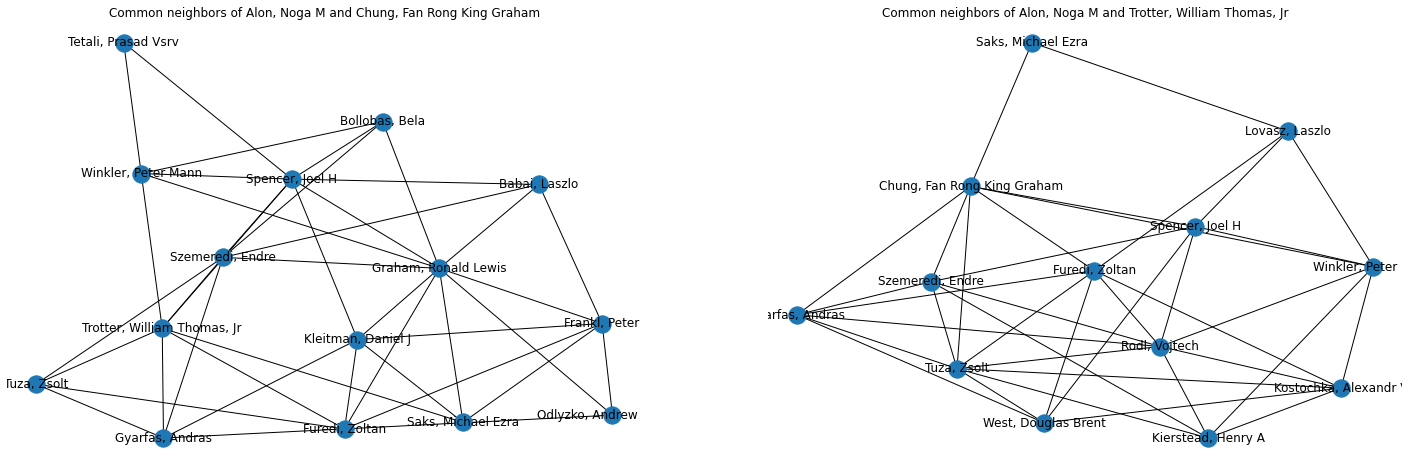

In [61]:
author = 'Alon, Noga M'
nodes = ['Chung, Fan Rong King Graham', 'Trotter, William Thomas, Jr']

common_neighbors_plot_2_graphs(G, author)

# HITS

A gráf nem irányított, így kevés értelme van a HITS-nek.
Irányítsuk a magyarok felé az éleket! 

Ha (u,v) egy él az eredetiben

- (u,v), (v,u) él, ha mindkettő magyar vagy külföldi
- (u,v), ha u külföldi, v magyar

Tehát a magyarok akarnak lenni az authority-k, külföldiek link-gyűjtemények.

In [19]:
C = nx.k_core(G, k=10)
print(C.nodes)

hung = [ 
    'Szemeredi, Endre', 'Babai, Laszlo', 'Tuza, Zsolt', 'Frankl, Peter',
    'Furedi, Zoltan', 'Sos, Vera Turan','Bollobas, Bela', 'Lovasz, Laszlo', 
    'Pach, Janos','Gyarfas, Andras','Simonovits, Miklos'
]

bilayout = nx.bipartite_layout(C,hung)

['Kostochka, Alexandr V', 'Trotter, William Thomas, Jr', 'Rodl, Vojtech', 'Szemeredi, Endre', 'Burr, Stefan Andrus', 'Luczak, Tomasz', 'Tuza, Zsolt', 'Babai, Laszlo', 'Spencer, Joel H', 'Alon, Noga M', 'Chung, Fan Rong King Graham', 'Pach, Janos', 'Furedi, Zoltan', 'Nesetril, Jaroslav', 'Bollobas, Bela', 'Gyarfas, Andras', 'Schelp, Richard H', 'Graham, Ronald Lewis', 'Simonovits, Miklos', 'Sos, Vera Turan', 'Faudree, Ralph Jasper, Jr', 'Lovasz, Laszlo', 'Frankl, Peter']


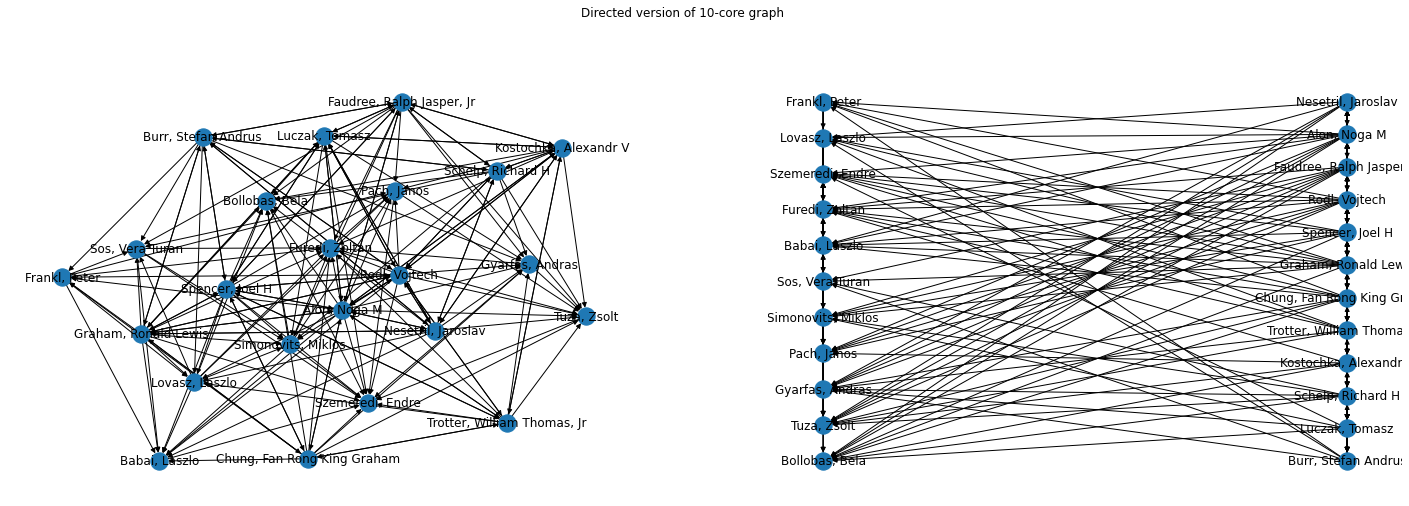

In [20]:
H = nx.DiGraph()

for u in C.nodes():
    for v in C.neighbors(u):
        if (u,v) not in H.edges():
            if u in hung:
                H.add_edge(v,u)
            else:
                H.add_edge(u,v)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8))
ax = axes.flatten()

nx.draw(H, with_labels=True, pos=layout, ax=ax[0])
ax[0].set_axis_off()
nx.draw(H, with_labels=True, pos=bilayout, ax=ax[1])                
ax[1].set_axis_off()

fig.suptitle('Directed version of 10-core graph')
plt.show()

In [21]:
def pprint_dict(d):
    pp.pprint({key: value for key, value in sorted(d.items(), key=lambda item: item[1], reverse=True)})

In [22]:
hub, auth = nx.hits(H)

print('Are Hungarians are the worst hubs?')
pprint_dict(hub)

Are Hungarians are the worst hubs?
{   'Alon, Noga M': 0.09659765029549723,
    'Rodl, Vojtech': 0.09090760168742504,
    'Graham, Ronald Lewis': 0.07984888978910085,
    'Spencer, Joel H': 0.07336256957063608,
    'Faudree, Ralph Jasper, Jr': 0.07055405277381552,
    'Nesetril, Jaroslav': 0.0666259615293444,
    'Chung, Fan Rong King Graham': 0.06427310198820199,
    'Luczak, Tomasz': 0.06282172771631518,
    'Kostochka, Alexandr V': 0.05980652949443777,
    'Trotter, William Thomas, Jr': 0.057094745226490155,
    'Schelp, Richard H': 0.052677431863777616,
    'Burr, Stefan Andrus': 0.0477504050482002,
    'Lovasz, Laszlo': 0.03319616059827867,
    'Simonovits, Miklos': 0.031496527524658674,
    'Frankl, Peter': 0.02565179689123481,
    'Sos, Vera Turan': 0.024318922385894837,
    'Gyarfas, Andras': 0.019454683541812352,
    'Pach, Janos': 0.012722612431444359,
    'Furedi, Zoltan': 0.011283886188317275,
    'Bollobas, Bela': 0.006518247818372253,
    'Tuza, Zsolt': 0.0065182478183722

In [23]:
print('Are Hungarians are the best authorities?')
pprint_dict(auth)

Are Hungarians are the best authorities?
{   'Bollobas, Bela': 0.05977189441269974,
    'Furedi, Zoltan': 0.05648092895838799,
    'Szemeredi, Endre': 0.05468698799031646,
    'Alon, Noga M': 0.05406799879959144,
    'Gyarfas, Andras': 0.05268515979605561,
    'Tuza, Zsolt': 0.05205356140745025,
    'Rodl, Vojtech': 0.051585566839790986,
    'Babai, Laszlo': 0.05069436508456886,
    'Spencer, Joel H': 0.04927360934780211,
    'Luczak, Tomasz': 0.046494103735745876,
    'Graham, Ronald Lewis': 0.04343623026396811,
    'Kostochka, Alexandr V': 0.042998715634718354,
    'Pach, Janos': 0.04261632007899855,
    'Nesetril, Jaroslav': 0.042404772818481755,
    'Simonovits, Miklos': 0.04216933098799731,
    'Lovasz, Laszlo': 0.03864530003271728,
    'Burr, Stefan Andrus': 0.03752506340891268,
    'Faudree, Ralph Jasper, Jr': 0.03398331904185808,
    'Trotter, William Thomas, Jr': 0.033285621100901726,
    'Frankl, Peter': 0.03280401148796236,
    'Schelp, Richard H': 0.02902249967722212,
    '